# 1. Area Estimation

### This script is used to convert the classified images to area data and plot the results

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import rasterio
import re
from scipy import stats
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.dates as mdates

In [45]:
# set font to Latex options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', serif='Computer Modern Roman')

### 1. Get information from the classified tif-files

In [2]:
# function to process the tif files and save the data to a csv
def process_tif_files(directory):
    results = []

    for root, dirs, files in os.walk(directory):
        for filename in files:
            if filename.endswith(".tif") and filename.startswith("LULC"):
                filepath = os.path.join(root, filename)  
                
                with rasterio.open(filepath) as src:
                    image = src.read(1)

                    class_0 = np.sum(image == 0)
                    class_1 = np.sum(image == 1)
                    class_2 = np.sum(image == 2)
                    class_3 = np.sum(image == 3)
                    class_4 = np.sum(image == 4)
                    class_5 = np.sum(image == 5)
                    class_6 = np.sum(image == 6)
                    class_7 = np.sum(image == 7)
                    print('C_0', class_0, 'C_1', class_1, 'C_2', class_2, 'C_3', class_3, 'C_4', class_4, 'C_5', class_5, 'C_6', class_6, 'C_7', class_7)

                    results.append({
                        'filename': filename,
                        'class_0': class_0,
                        'class_1': class_1,
                        'class_2': class_2,
                        'class_3': class_3,
                        'class_4': class_4,
                        'class_5': class_5,
                        'class_6': class_6,
                        'class_7': class_7
                    })

                    del image

    results_df = pd.DataFrame(results)
    results_df.to_csv(os.path.join(directory, 'Classification_Area_7K.csv'), index=False)


directory_path = r"tif_path"
process_tif_files(directory_path)

C_0 203051375 C_1 4129845 C_2 5044 C_3 367882 C_4 692533 C_5 932487 C_6 420255 C_7 2606611
C_0 203172279 C_1 4582221 C_2 4946 C_3 456027 C_4 503455 C_5 647253 C_6 120256 C_7 2840499
C_0 203051375 C_1 4098339 C_2 5394 C_3 420583 C_4 566072 C_5 851165 C_6 117790 C_7 3095314
C_0 203051375 C_1 4589698 C_2 0 C_3 527365 C_4 360045 C_5 449514 C_6 31994 C_7 3196041
C_0 203051375 C_1 4314927 C_2 4737 C_3 440855 C_4 475785 C_5 911671 C_6 78574 C_7 2928108
C_0 203051375 C_1 2824589 C_2 5818 C_3 799431 C_4 568938 C_5 729657 C_6 400175 C_7 3826049
C_0 201737104 C_1 5751484 C_2 20272 C_3 986317 C_4 1051043 C_5 621901 C_6 780112 C_7 1257799
C_0 201858008 C_1 6067878 C_2 22434 C_3 1227848 C_4 1076364 C_5 207469 C_6 760200 C_7 1106735
C_0 201737104 C_1 5835605 C_2 19637 C_3 1178528 C_4 1086565 C_5 251320 C_6 890708 C_7 1206565
C_0 201737104 C_1 5980802 C_2 15237 C_3 1655464 C_4 891344 C_5 144279 C_6 293010 C_7 1488792
C_0 201737104 C_1 5871865 C_2 26287 C_3 1194132 C_4 1053516 C_5 374673 C_6 774393 C_7

C_0 114401736 C_1 7648684 C_2 26603 C_3 790236 C_4 1226095 C_5 496830 C_6 124947 C_7 1023458
C_0 113527712 C_1 7103187 C_2 29763 C_3 580590 C_4 993980 C_5 1234164 C_6 331557 C_7 2047846
C_0 113594642 C_1 8403813 C_2 38199 C_3 706507 C_4 773291 C_5 756818 C_6 114246 C_7 1528213
C_0 113527712 C_1 8236132 C_2 30111 C_3 500379 C_4 780029 C_5 876391 C_6 162058 C_7 1735987
C_0 113527712 C_1 8262230 C_2 53864 C_3 1054182 C_4 617056 C_5 763763 C_6 849 C_7 1569143
C_0 113527712 C_1 7953088 C_2 31804 C_3 535419 C_4 766772 C_5 1171472 C_6 117443 C_7 1745089
C_0 113527712 C_1 8116034 C_2 33789 C_3 1507029 C_4 697581 C_5 945048 C_6 272283 C_7 749323
C_0 201794425 C_1 5899719 C_2 24916 C_3 686468 C_4 1036230 C_5 735061 C_6 285945 C_7 1743268
C_0 201915329 C_1 7018986 C_2 35073 C_3 837844 C_4 891681 C_5 503937 C_6 65703 C_7 1058383
C_0 201794425 C_1 6836436 C_2 31150 C_3 755538 C_4 914401 C_5 573023 C_6 116280 C_7 1184779
C_0 201794425 C_1 6336782 C_2 48005 C_3 1488376 C_4 722301 C_5 567733 C_6 58 C_

C_0 118677204 C_1 4193424 C_2 13607 C_3 72386 C_4 466791 C_5 114280 C_6 264007 C_7 1374819
C_0 118744012 C_1 4371959 C_2 7314 C_3 78252 C_4 387613 C_5 163505 C_6 185608 C_7 1305063
C_0 118677204 C_1 4283004 C_2 5379 C_3 74588 C_4 455672 C_5 124985 C_6 211069 C_7 1344617
C_0 118677204 C_1 4299396 C_2 0 C_3 69416 C_4 249602 C_5 316078 C_6 30165 C_7 1534657
C_0 118677204 C_1 4311421 C_2 8106 C_3 84496 C_4 326314 C_5 225427 C_6 166258 C_7 1377292
C_0 118677204 C_1 4509230 C_2 7162 C_3 47053 C_4 361988 C_5 164205 C_6 345746 C_7 1063930
C_0 113685403 C_1 7652960 C_2 10246 C_3 210334 C_4 872061 C_5 1220415 C_6 1569468 C_7 793227
C_0 113752363 C_1 8838898 C_2 7957 C_3 216500 C_4 983976 C_5 602602 C_6 1007060 C_7 671718
C_0 113685403 C_1 8559140 C_2 8997 C_3 149185 C_4 771390 C_5 1018273 C_6 1086294 C_7 735432
C_0 113685403 C_1 8358233 C_2 191 C_3 547714 C_4 819072 C_5 708336 C_6 532216 C_7 1362949
C_0 113685403 C_1 8392577 C_2 6728 C_3 157568 C_4 1046147 C_5 888192 C_6 1134405 C_7 703094
C_0 1

C_0 113817998 C_1 7831024 C_2 80475 C_3 990401 C_4 612976 C_5 138444 C_6 452933 C_7 1362477
C_0 113884826 C_1 8304145 C_2 87953 C_3 1055646 C_4 688114 C_5 33289 C_6 144506 C_7 1155077
C_0 113817998 C_1 8073848 C_2 85409 C_3 1000673 C_4 689155 C_5 37739 C_6 293788 C_7 1288118
C_0 113817998 C_1 8205243 C_2 118423 C_3 1520967 C_4 466820 C_5 41585 C_6 13618 C_7 1102074
C_0 113817998 C_1 8241203 C_2 85653 C_3 1060712 C_4 779817 C_5 55222 C_6 82297 C_7 1163826
C_0 113817998 C_1 6950783 C_2 65260 C_3 1131622 C_4 963423 C_5 56343 C_6 173231 C_7 2128068
C_0 198041534 C_1 9578539 C_2 537932 C_3 1918032 C_4 698716 C_5 111162 C_6 181415 C_7 1138702
C_0 198162438 C_1 10356360 C_2 555632 C_3 1891408 C_4 667668 C_5 93445 C_6 67005 C_7 532980
C_0 198041534 C_1 10315214 C_2 550169 C_3 1696627 C_4 658287 C_5 100877 C_6 155057 C_7 688267
C_0 198041534 C_1 9895194 C_2 618990 C_3 1975389 C_4 573876 C_5 95519 C_6 0 C_7 1005530
C_0 198041534 C_1 10105651 C_2 536960 C_3 2097668 C_4 629790 C_5 111819 C_6 26837

C_0 205391794 C_1 5257922 C_2 0 C_3 183629 C_4 480478 C_5 65405 C_6 115092 C_7 832616
C_0 205270890 C_1 5275916 C_2 0 C_3 167014 C_4 516593 C_5 74269 C_6 125224 C_7 776126
C_0 205270890 C_1 4437788 C_2 0 C_3 312646 C_4 384097 C_5 76841 C_6 6191 C_7 1717579
C_0 205270890 C_1 5119158 C_2 0 C_3 184220 C_4 482070 C_5 69457 C_6 142681 C_7 937556
C_0 205270890 C_1 5230647 C_2 0 C_3 150243 C_4 493546 C_5 78518 C_6 268305 C_7 713883
C_0 114337520 C_1 6965489 C_2 3538 C_3 407929 C_4 1469549 C_5 94415 C_6 521406 C_7 1376672
C_0 114404328 C_1 7620269 C_2 1847 C_3 421878 C_4 1338115 C_5 24249 C_6 328157 C_7 1104483
C_0 114337520 C_1 7756369 C_2 1244 C_3 348951 C_4 1375778 C_5 33354 C_6 319159 C_7 1004143
C_0 114337520 C_1 7749305 C_2 1996 C_3 877848 C_4 944032 C_5 24114 C_6 71270 C_7 1170433
C_0 114337520 C_1 7412214 C_2 903 C_3 383003 C_4 1408417 C_5 26763 C_6 330755 C_7 1276943
C_0 114337520 C_1 7259392 C_2 7919 C_3 521192 C_4 1120791 C_5 29518 C_6 540307 C_7 1359879
C_0 115435812 C_1 7813631 C_

C_0 198047438 C_1 10680601 C_2 11037 C_3 592680 C_4 930967 C_5 474445 C_6 17008 C_7 1451856
C_0 198047438 C_1 10804036 C_2 14921 C_3 369702 C_4 885575 C_5 656539 C_6 191649 C_7 1236172
C_0 198047438 C_1 10945945 C_2 20219 C_3 793000 C_4 883644 C_5 158768 C_6 426647 C_7 930371
C_0 120150409 C_1 4096012 C_2 15116 C_3 106125 C_4 613091 C_5 164241 C_6 520531 C_7 1660619
C_0 120217609 C_1 4696119 C_2 20092 C_3 141822 C_4 668034 C_5 33807 C_6 175790 C_7 1440071
C_0 120150409 C_1 4571102 C_2 20092 C_3 116694 C_4 674691 C_5 39142 C_6 252127 C_7 1501887
C_0 120150409 C_1 4597743 C_2 24163 C_3 233056 C_4 643627 C_5 43628 C_6 41444 C_7 1592074
C_0 120150409 C_1 4683751 C_2 19562 C_3 136168 C_4 645914 C_5 44283 C_6 165922 C_7 1480135
C_0 120150409 C_1 4489923 C_2 6953 C_3 145227 C_4 698335 C_5 17678 C_6 229232 C_7 1588387
C_0 114718144 C_1 8024184 C_2 25341 C_3 442084 C_4 750675 C_5 252934 C_6 254320 C_7 2516780
C_0 114785282 C_1 8494914 C_2 25006 C_3 508286 C_4 833048 C_5 107036 C_6 92889 C_7 220

### 2. Further prepare the data

In [3]:
# in case you restart the script here, load the data from the csv-file
df_area = pd.read_csv(r"result_csv_path", delimiter=',')

In [4]:
print(df_area.columns)

Index(['filename', 'class_0', 'class_1', 'class_2', 'class_3', 'class_4',
       'class_5', 'class_6', 'class_7'],
      dtype='object')


In [5]:
df_area['area_sum'] = df_area['class_1'] + df_area['class_2'] + df_area['class_3'] + df_area['class_4'] + df_area['class_5'] + df_area['class_6'] + df_area['class_7']

In [ ]:
# compute proportions
df_area['class_1_perc'] = df_area['class_1'] / df_area['area_sum']
df_area['class_2_perc'] = df_area['class_2'] / df_area['area_sum']
df_area['class_3_perc'] = df_area['class_3'] / df_area['area_sum']
df_area['class_4_perc'] = df_area['class_4'] / df_area['area_sum']
df_area['class_5_perc'] = df_area['class_5'] / df_area['area_sum']
df_area['class_6_perc'] = df_area['class_6'] / df_area['area_sum']
df_area['class_7_perc'] = df_area['class_7'] / df_area['area_sum']

In [7]:
df_area['SG_all_perc'] = df_area['class_2_perc'] + df_area['class_3_perc']

In [8]:
print(df_area.head(10))

                                 filename    class_0  class_1  class_2  \
0  LULC_cart_Classified_6K_2018-04-18.tif  203051375  4129845     5044   
1  LULC_cons_Classified_6K_2018-04-18.tif  203172279  4582221     4946   
2   LULC_gbt_Classified_6K_2018-04-18.tif  203051375  4098339     5394   
3   LULC_knn_Classified_6K_2018-04-18.tif  203051375  4589698        0   
4    LULC_rf_Classified_6K_2018-04-18.tif  203051375  4314927     4737   
5   LULC_svm_Classified_6K_2018-04-18.tif  203051375  2824589     5818   
6  LULC_cart_Classified_6K_2018-04-23.tif  201737104  5751484    20272   
7  LULC_cons_Classified_6K_2018-04-23.tif  201858008  6067878    22434   
8   LULC_gbt_Classified_6K_2018-04-23.tif  201737104  5835605    19637   
9   LULC_knn_Classified_6K_2018-04-23.tif  201737104  5980802    15237   

   class_3  class_4  class_5  class_6  class_7  area_sum  class_1_perc  \
0   367882   692533   932487   420255  2606611   9154657      0.451120   
1   456027   503455   647253   120256

In [9]:
# get Date and classifier name
def extract_info(filename):
    match = re.search(r'LULC_(\w+)_Classified_6K_(\d{4}-\d{2}-\d{2})\.tif', filename)
    if match:
        classifier = match.group(1)
        date = match.group(2)
        return pd.Series([classifier, date])
    return pd.Series([None, None])

df_area[['classifier', 'date']] = df_area['filename'].apply(extract_info)
df_area['date'] = pd.to_datetime(df_area['date'])

In [10]:
# export final csv
df_area.to_csv(r"export_path", index=False)

### 3. Plot the data

In [3]:
# load final csv in case you restart here
df_area = pd.read_csv(r"export_path", delimiter=',')

In [4]:
df_area['date'] = pd.to_datetime(df_area['date'])

In [5]:
# split into data frames by classifiers
df_cart = df_area[df_area['classifier'] == 'cart']
df_rf = df_area[df_area['classifier'] == 'rf']
df_svm = df_area[df_area['classifier'] == 'svm']
df_knn = df_area[df_area['classifier'] == 'knn']
df_gbt = df_area[df_area['classifier'] == 'gbt']
df_cons = df_area[df_area['classifier'] == 'cons']

In [6]:
def add_trendline(df, x_col, y_col, color):
    x = df[x_col].map(pd.Timestamp.toordinal).values  
    y = df[y_col].values
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    plt.plot(df[x_col], slope * x + intercept, color=color, linestyle='--', linewidth=1)

# Dense Seegras

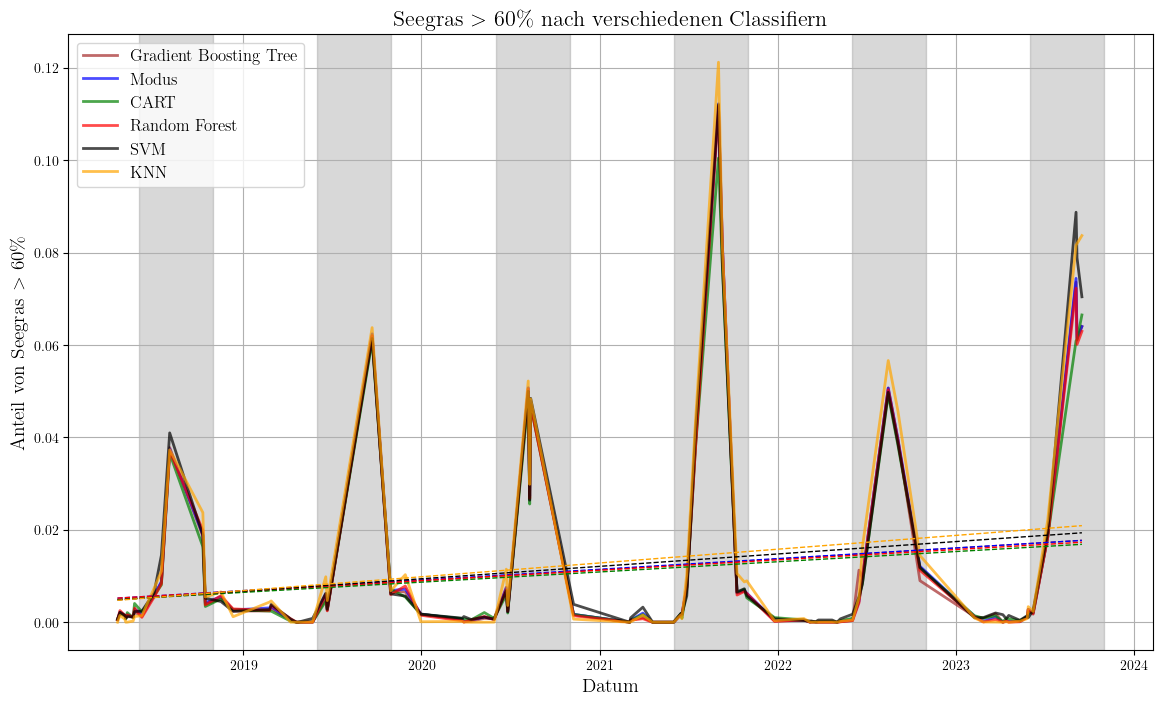

In [35]:
plt.figure(figsize=(14, 8))  

a=.7
lw = 2
plt.plot(df_gbt['date'], df_gbt['class_2_perc'], c='brown', label='Gradient Boosting Tree', alpha=a, linewidth=lw)
plt.plot(df_cons['date'], df_cons['class_2_perc'], c='blue', label='Modus', alpha=a, linewidth=lw)
plt.plot(df_cart['date'], df_cart['class_2_perc'], c='green', label='CART', alpha=a, linewidth=lw)
plt.plot(df_rf['date'], df_rf['class_2_perc'], c='red', label='Random Forest', alpha=a, linewidth=lw)
plt.plot(df_svm['date'], df_svm['class_2_perc'], c='black', label='SVM', alpha=a, linewidth=lw)
plt.plot(df_knn['date'], df_knn['class_2_perc'], c='orange', label='KNN', alpha=a, linewidth=lw)

add_trendline(df_gbt, 'date', 'class_2_perc', 'brown')
add_trendline(df_cons, 'date', 'class_2_perc', 'blue')
add_trendline(df_cart, 'date', 'class_2_perc', 'green')
add_trendline(df_rf, 'date', 'class_2_perc', 'red')
add_trendline(df_svm, 'date', 'class_2_perc', 'black')
add_trendline(df_knn, 'date', 'class_2_perc', 'orange')


years = df_cart['date'].dt.year.unique()
for year in years:
    start = pd.Timestamp(f'{year}-06-01')
    end = pd.Timestamp(f'{year}-10-31')
    plt.axvspan(start, end, color='grey', alpha=0.3)

plt.xlabel('Datum', fontsize=14)
plt.ylabel('Anteil von Seegras $>$ 60\% ', fontsize=14)

plt.title('Seegras $>$ 60\% nach verschiedenen Classifiern', fontsize=16)

plt.legend(loc='best', fontsize=12)

plt.grid(True)

plt.savefig(r"export_path")
plt.show()

# (LOESS, in case that's of interest)

In [20]:
def add_loess(df, x_col, y_col, color, frac=0.2):
    loess_smoothed = lowess(df[y_col], mdates.date2num(df[x_col]), frac=frac)
    plt.plot(mdates.num2date(loess_smoothed[:, 0]), loess_smoothed[:, 1], color=color, linestyle='--')

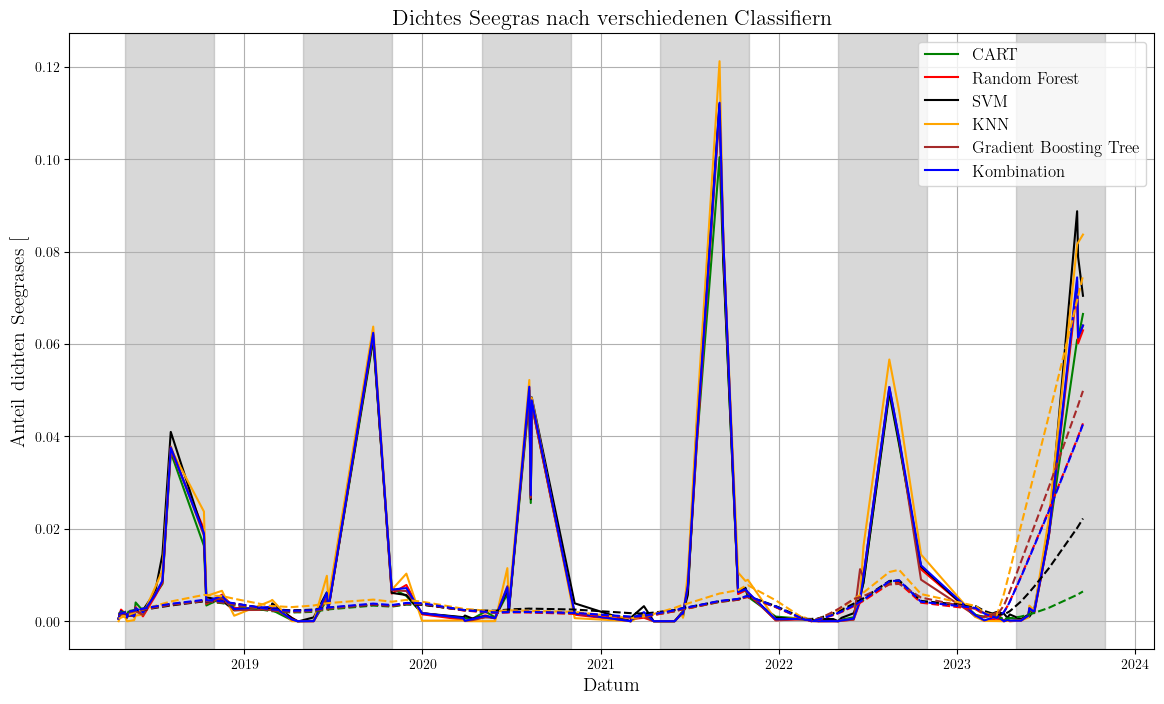

In [21]:
plt.figure(figsize=(14, 8))  

plt.plot(df_cart['date'], df_cart['class_2_perc'], c='green', label='CART')
plt.plot(df_rf['date'], df_rf['class_2_perc'], c='red', label='Random Forest')
plt.plot(df_svm['date'], df_svm['class_2_perc'], c='black', label='SVM')
plt.plot(df_knn['date'], df_knn['class_2_perc'], c='orange', label='KNN')
plt.plot(df_gbt['date'], df_gbt['class_2_perc'], c='brown', label='Gradient Boosting Tree')
plt.plot(df_cons['date'], df_cons['class_2_perc'], c='blue', label='Kombination')

add_loess(df_cart, 'date', 'class_2_perc', 'green')
add_loess(df_rf, 'date', 'class_2_perc', 'red')
add_loess(df_svm, 'date', 'class_2_perc', 'black')
add_loess(df_knn, 'date', 'class_2_perc', 'orange')
add_loess(df_gbt, 'date', 'class_2_perc', 'brown')
add_loess(df_cons, 'date', 'class_2_perc', 'blue')

years = df_cart['date'].dt.year.unique()
for year in years:
    start = pd.Timestamp(f'{year}-05-01')
    end = pd.Timestamp(f'{year}-10-31')
    plt.axvspan(start, end, color='grey', alpha=0.3)

plt.xlabel('Datum', fontsize=14)
plt.ylabel('Anteil dichten Seegrases [%]', fontsize=14)

plt.title('Dichtes Seegras nach verschiedenen Classifiern', fontsize=16)

plt.legend(loc='best', fontsize=12)

plt.grid(True)

plt.show()

# Sparse Seegras

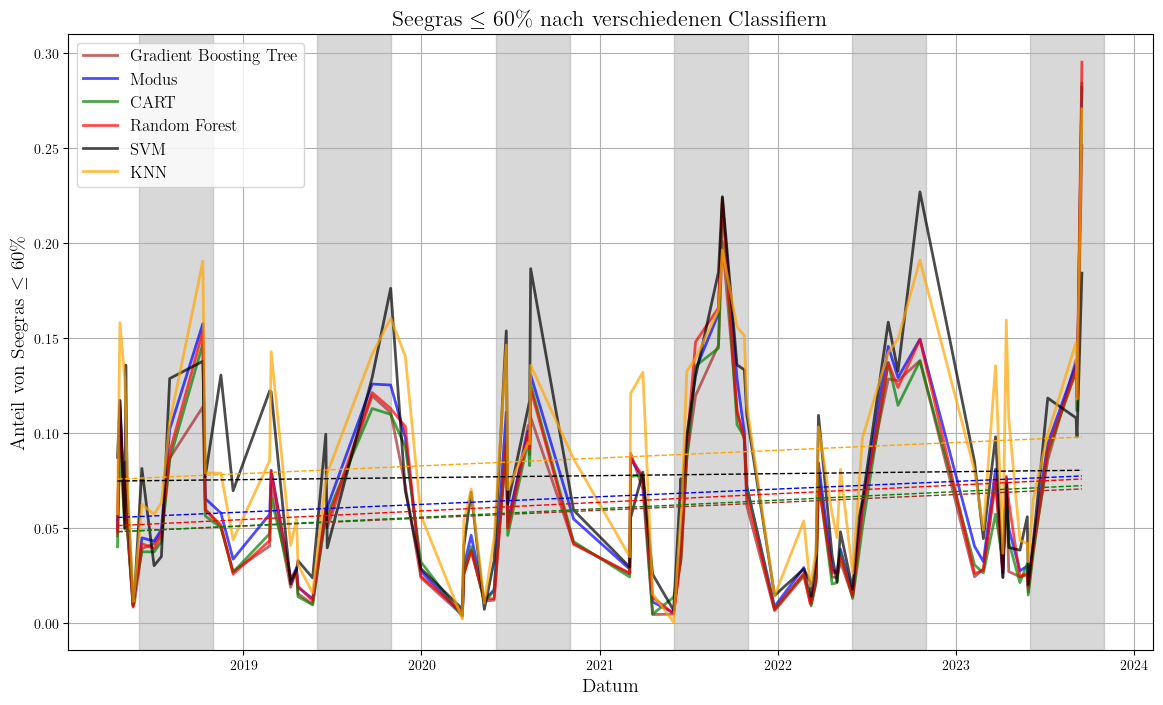

In [34]:
plt.figure(figsize=(14, 8))  

a=.7
lw = 2
plt.plot(df_gbt['date'], df_gbt['class_3_perc'], c='brown', label='Gradient Boosting Tree', alpha=a, linewidth=lw)
plt.plot(df_cons['date'], df_cons['class_3_perc'], c='blue', label='Modus', alpha=a, linewidth=lw)
plt.plot(df_cart['date'], df_cart['class_3_perc'], c='green', label='CART', alpha=a, linewidth=lw)
plt.plot(df_rf['date'], df_rf['class_3_perc'], c='red', label='Random Forest', alpha=a, linewidth=lw)
plt.plot(df_svm['date'], df_svm['class_3_perc'], c='black', label='SVM', alpha=a, linewidth=lw)
plt.plot(df_knn['date'], df_knn['class_3_perc'], c='orange', label='KNN', alpha=a, linewidth=lw)

add_trendline(df_gbt, 'date', 'class_3_perc', 'brown')
add_trendline(df_cons, 'date', 'class_3_perc', 'blue')
add_trendline(df_cart, 'date', 'class_3_perc', 'green')
add_trendline(df_rf, 'date', 'class_3_perc', 'red')
add_trendline(df_svm, 'date', 'class_3_perc', 'black')
add_trendline(df_knn, 'date', 'class_3_perc', 'orange')


years = df_cart['date'].dt.year.unique()
for year in years:
    start = pd.Timestamp(f'{year}-06-01')
    end = pd.Timestamp(f'{year}-10-31')
    plt.axvspan(start, end, color='grey', alpha=0.3)

plt.xlabel('Datum', fontsize=14)
plt.ylabel('Anteil von Seegras $\leq$ 60\% ', fontsize=14)

plt.title('Seegras $\leq$ 60\% nach verschiedenen Classifiern', fontsize=16)

plt.legend(loc='best', fontsize=12)

plt.grid(True)

plt.savefig(r"export_path")
plt.show()

# Both seagrass classes

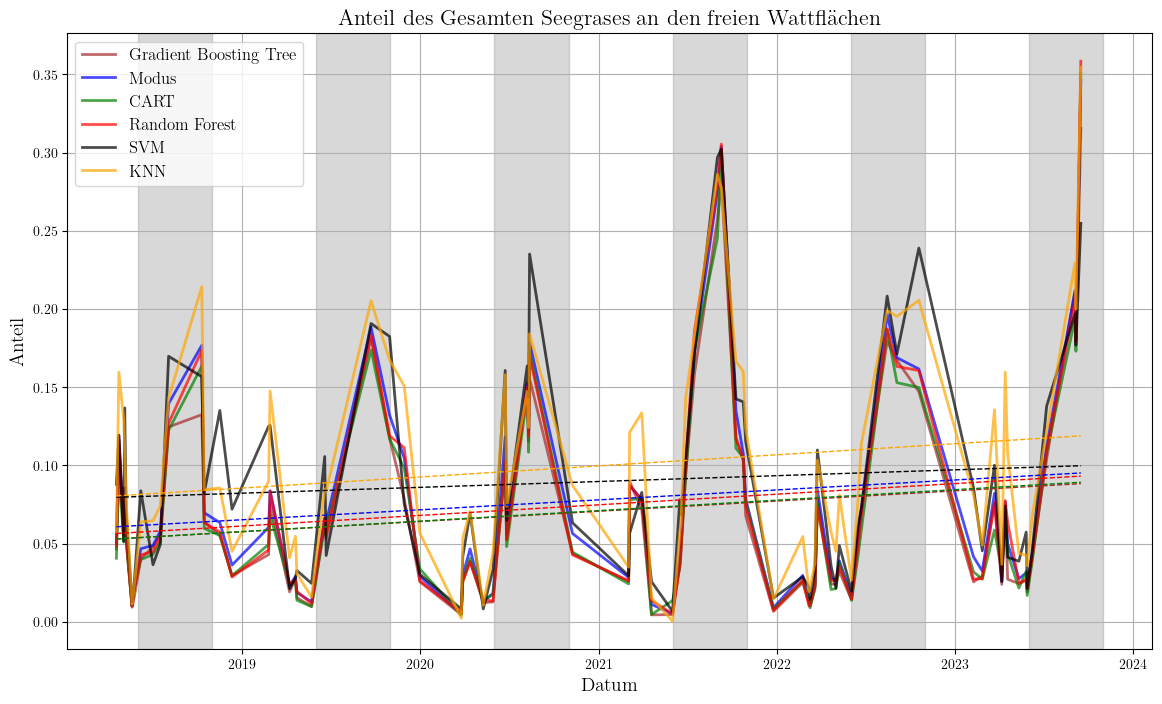

In [33]:
plt.figure(figsize=(14, 8))  

a=.7
lw = 2
ls = '-'
plt.plot(df_gbt['date'], df_gbt['SG_all_perc'], c='brown', label='Gradient Boosting Tree', alpha=a, linewidth=lw, linestyle=ls)
plt.plot(df_cons['date'], df_cons['SG_all_perc'], c='blue', label='Modus', alpha=a, linewidth=lw, linestyle=ls)
plt.plot(df_cart['date'], df_cart['SG_all_perc'], c='green', label='CART', alpha=a, linewidth=lw, linestyle=ls)
plt.plot(df_rf['date'], df_rf['SG_all_perc'], c='red', label='Random Forest', alpha=a, linewidth=lw, linestyle=ls)
plt.plot(df_svm['date'], df_svm['SG_all_perc'], c='black', label='SVM', alpha=a, linewidth=lw, linestyle=ls)
plt.plot(df_knn['date'], df_knn['SG_all_perc'], c='orange', label='KNN', alpha=a, linewidth=lw, linestyle=ls)

add_trendline(df_gbt, 'date', 'SG_all_perc', 'brown')
add_trendline(df_cons, 'date', 'SG_all_perc', 'blue')
add_trendline(df_cart, 'date', 'SG_all_perc', 'green')
add_trendline(df_rf, 'date', 'SG_all_perc', 'red')
add_trendline(df_svm, 'date', 'SG_all_perc', 'black')
add_trendline(df_knn, 'date', 'SG_all_perc', 'orange')


years = df_cart['date'].dt.year.unique()
for year in years:
    start = pd.Timestamp(f'{year}-06-01')
    end = pd.Timestamp(f'{year}-10-31')
    plt.axvspan(start, end, color='grey', alpha=0.3)

plt.xlabel('Datum', fontsize=14)
plt.ylabel('Anteil', fontsize=14)

plt.title('Anteil des Gesamten Seegrases an den freien Wattflächen', fontsize=16)

plt.legend(loc='best', fontsize=12)

plt.grid(True)
plt.savefig(r"export_path")
plt.show()

### 4. Data only from the summer months to reduce noise

In [47]:
# combine summer images
def process_combined_files(directory):
    results = []

    for root, dirs, files in os.walk(directory):
        for filename in files:
            if filename.endswith(".tif") and filename.startswith("Combined_7K"):
                filepath = os.path.join(root, filename)  
                
                with rasterio.open(filepath) as src:
                    image = src.read(1)

                    class_0 = np.sum(image == 0)
                    class_1 = np.sum(image == 1)
                    class_2 = np.sum(image == 2)
                    class_3 = np.sum(image == 3)
                    print('C_0', class_0, 'C_1', class_1, 'C_2', class_2, 'C_3', class_3)

                    results.append({
                        'filename': filename,
                        'class_0': class_0,
                        'class_1': class_1,
                        'class_2': class_2,
                        'class_3': class_3
                    })

                    del image

    results_df = pd.DataFrame(results)
    results_df.to_csv(os.path.join(directory, 'Combined_Area_7K.csv'), index=False)


directory_path = r"directory_path"
process_combined_files(directory_path)

C_0 110128683 C_1 14070656 C_2 489137 C_3 1580420
C_0 109325836 C_1 13020853 C_2 717601 C_3 1616863
C_0 109200418 C_1 13482432 C_2 673959 C_3 2106977
C_0 108325935 C_1 12864391 C_2 1133748 C_3 2577539
C_0 109406005 C_1 12628417 C_2 825614 C_3 2041577
C_0 109676326 C_1 12193774 C_2 1330239 C_3 2494930


In [36]:
# read combined file
df_combined = pd.read_csv(r"combined_file_path", delimiter=',')

In [37]:
def extract_combined_info(filename):
    match = re.search(r'Combined_7K_(\w+).tif', filename)
    if match:
        date = match.group(1)
        return pd.Series([date])
    return pd.Series([None])

df_combined[['year']] = df_combined['filename'].apply(extract_combined_info)

In [38]:
df_combined['sum'] = df_combined['class_1'] + df_combined['class_2'] + df_combined['class_3']
df_combined['class_1_perc'] = df_combined['class_1'] / df_combined['sum']
df_combined['class_2_perc'] = df_combined['class_2'] / df_combined['sum']
df_combined['class_3_perc'] = df_combined['class_3'] / df_combined['sum']

In [39]:
df_combined['year'] = df_combined['year'].astype(int)
print(df_combined.dtypes)

filename         object
class_0           int64
class_1           int64
class_2           int64
class_3           int64
year              int32
sum               int64
class_1_perc    float64
class_2_perc    float64
class_3_perc    float64
dtype: object


In [40]:
df_melted = df_combined.melt(id_vars='year', value_vars=['class_1_perc', 'class_2_perc', 'class_3_perc'], var_name='class', value_name='value')
print(df_melted)

    year         class     value
0   2018  class_1_perc  0.871776
1   2019  class_1_perc  0.847970
2   2020  class_1_perc  0.829006
3   2021  class_1_perc  0.776100
4   2022  class_1_perc  0.814968
5   2023  class_1_perc  0.761210
6   2018  class_2_perc  0.030305
7   2019  class_2_perc  0.046733
8   2020  class_2_perc  0.041440
9   2021  class_2_perc  0.068398
10  2022  class_2_perc  0.053281
11  2023  class_2_perc  0.083042
12  2018  class_3_perc  0.097918
13  2019  class_3_perc  0.105297
14  2020  class_3_perc  0.129554
15  2021  class_3_perc  0.155501
16  2022  class_3_perc  0.131752
17  2023  class_3_perc  0.155749


# Plot the summer data for each year

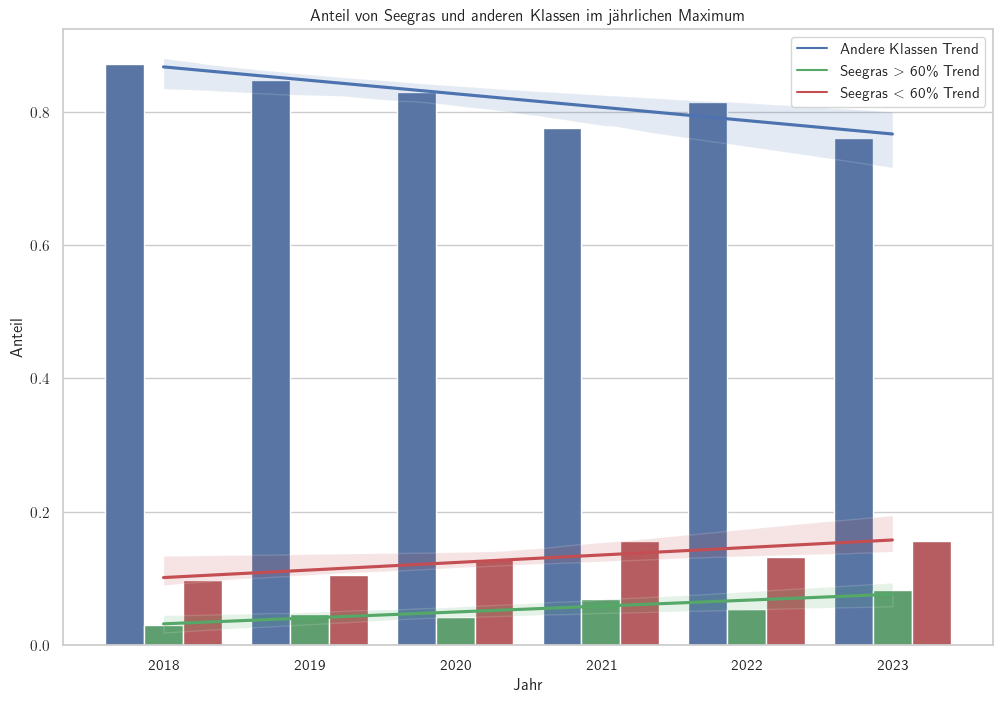

In [46]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))

barplot = sns.barplot(x='year', y='value', hue='class', data=df_melted, palette=['b', 'g', 'r'])
barplot.get_legend().remove()  

line1 = sns.regplot(x=df_combined.index, y='class_1_perc', data=df_combined, scatter=False, color='b')
line2 = sns.regplot(x=df_combined.index, y='class_2_perc', data=df_combined, scatter=False, color='g')
line3 = sns.regplot(x=df_combined.index, y='class_3_perc', data=df_combined, scatter=False, color='r')

plt.xlabel('Jahr')
plt.ylabel('Anteil')
plt.title('Anteil von Seegras und anderen Klassen im jährlichen Maximum')

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='b', label='Andere Klassen Trend'),
                   Line2D([0], [0], color='g', label='Seegras $>$ 60\% Trend'),
                   Line2D([0], [0], color='r', label='Seegras $<$ 60\% Trend')]

plt.legend(handles=legend_elements, loc='upper right')

plt.savefig(r"export_path")
plt.show()

### NDVI and Area combined

In [47]:
ndvi_df = pd.read_csv(r"ndvi_data", delimiter=',')
ndvi_df['date'] = ndvi_df['filename'].str.extract(r'_(\d{4}-\d{2}-\d{2})')[0]
ndvi_df['date'] = pd.to_datetime(ndvi_df['date'])
print(ndvi_df)

               filename    median      mean       std       date
0   NDVI_2017-10-27.tif  0.130435  0.142697  0.082717 2017-10-27
1   NDVI_2017-11-06.tif  0.146536  0.153051  0.078338 2017-11-06
2   NDVI_2018-01-08.tif  0.135754  0.136620  0.069315 2018-01-08
3   NDVI_2018-02-07.tif  0.138708  0.131056  0.073942 2018-02-07
4   NDVI_2018-02-19.tif  0.074670  0.080363  0.042775 2018-02-19
..                  ...       ...       ...       ...        ...
84  NDVI_2023-07-08.tif  0.133846  0.152256  0.092957 2023-07-08
85  NDVI_2023-09-04.tif  0.155733  0.205794  0.152755 2023-09-04
86  NDVI_2023-09-06.tif  0.136722  0.192964  0.160939 2023-09-06
87  NDVI_2023-09-16.tif  0.164179  0.208932  0.132333 2023-09-16
88  NDVI_2024-02-01.tif  0.110123  0.099854  0.079161 2024-02-01

[89 rows x 5 columns]


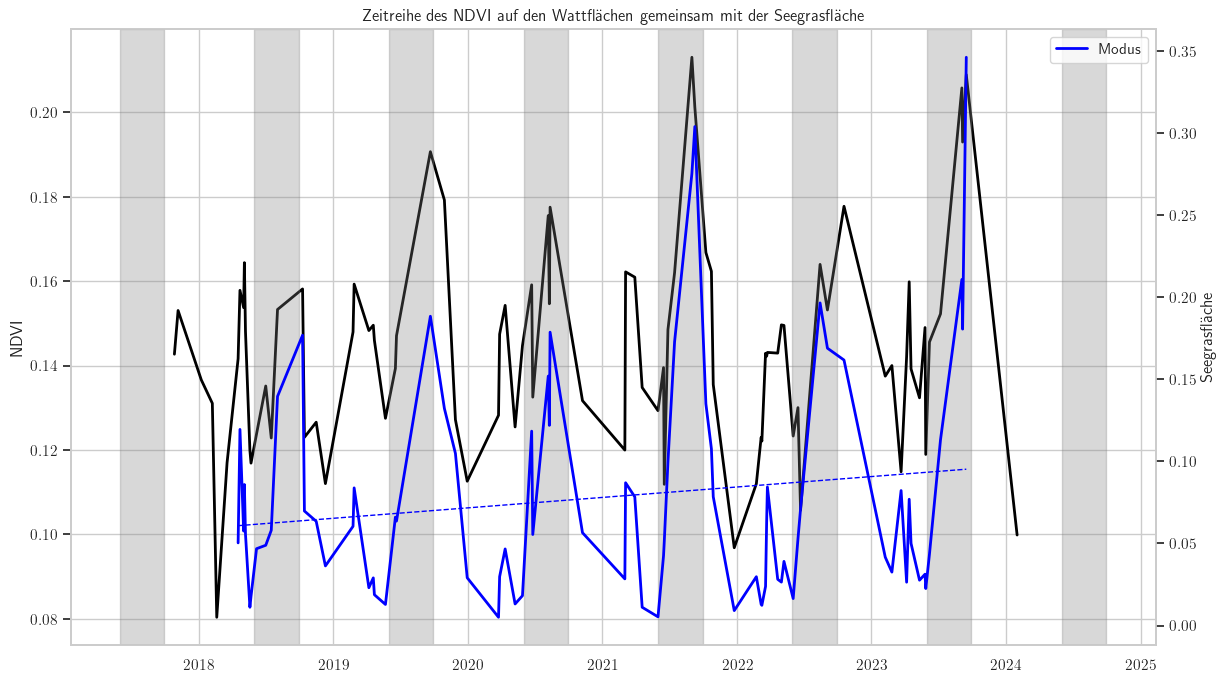

In [54]:
plt.figure(figsize=(14, 8))

#plt.errorbar(ndvi_df['date'], ndvi_df['mean'], yerr=ndvi_df['std'], fmt='-o', capsize=2.5, c='green', alpha=.7, label='NDVI Mean Error')
plt.plot(ndvi_df['date'], ndvi_df['mean'], c='black', alpha=1, label='NDVI Mean', linewidth=2)
plt.ylabel('NDVI')

ax = plt.gca().twinx()

#ax.plot(df_cart['date'], df_cart['SG_all_perc'], c='green', label='CART')
#ax.plot(df_rf['date'], df_rf['SG_all_perc'], c='red', label='Random Forest')
#ax.plot(df_knn['date'], df_knn['SG_all_perc'], c='orange', label='KNN')
#ax.plot(df_gbt['date'], df_gbt['SG_all_perc'], c='brown', label='Gradient Boosting Tree')
ax.plot(df_cons['date'], df_cons['SG_all_perc'], c='blue', label='Modus', linewidth=2)

#add_trendline(df_cart, 'date', 'SG_all_perc', 'green')
#add_trendline(df_rf, 'date', 'SG_all_perc', 'red')
#add_trendline(df_knn, 'date', 'SG_all_perc', 'orange')
#add_trendline(df_gbt, 'date', 'SG_all_perc', 'brown')
add_trendline(df_cons, 'date', 'SG_all_perc', 'blue')

years = ndvi_df['date'].dt.year.unique()
for year in years:
    start = pd.Timestamp(f'{year}-06-01')
    end = pd.Timestamp(f'{year}-09-30')
    plt.axvspan(start, end, color='grey', alpha=0.3)

plt.grid(False)
plt.title('Zeitreihe des NDVI auf den Wattflächen gemeinsam mit der Seegrasfläche')
plt.xlabel('Jahr')
ax.set_ylabel('Seegrasfläche')
ax.set_xlabel('Datum')
plt.legend(loc='upper right')

plt.savefig(r"export_path")
plt.show()